# Aurebesh/Star Wars Character Set Classifier

This notebook utilizes transfer learning to classify __handwritten__ Aurebesh into one of 26 different characters. Aurebesh is the character set used in the Star Wars universe. (https://starwars.fandom.com/wiki/Aurebesh) Each character translates to a Latin character. Aurebesh is a contraction of Aurek Besh which literally means "A, B". A typeset version of Aurebesh is below, along with the corresponding Latin characters. For this project, the classifier only works on the 26 characters that have an equivelant to the English alphabet, omitting special characters and characters that aren't found in the alphabet such as _Cherek_ or _Onith_.

<img src="Aurebesh-GMSR.png" />


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *

## Download Omniglot Dataset

Omniglot contains multiple character sets both real and fictional and Aurebesh is but one of the folders/languages found in it. In turn the Aurek-Besh folder contains 26 subfolders with 20 image files each. Each subfolder maps to one of 26 letters in the English alphabet. 

1. git clone https://github.com/brendenlake/omniglot into this directory
2. Find and unzip unzip images_evaluation
3. Move the Aurek-Besh folder to the same level as this notebook.
5. Rename sub-folders from'character01' to 'aurek-A' (for A-Z) for ease of understanding results

This source dataset is licensed under the MIT license and is fairly clean. Two out of 520 images were illegible and another 4 were misclassified according to my non-domain expertise of Aurebesh. The images are black and white (105x105) png's.

In [4]:
path = Path('Aurek-Besh')
path.ls()

[PosixPath('Aurek-Besh/Yirt-Y'),
 PosixPath('Aurek-Besh/Trill-T'),
 PosixPath('Aurek-Besh/Zerek-Z'),
 PosixPath('Aurek-Besh/Esk-E'),
 PosixPath('Aurek-Besh/Wesk-W'),
 PosixPath('Aurek-Besh/models'),
 PosixPath('Aurek-Besh/Xesh-X'),
 PosixPath('Aurek-Besh/Herf-H'),
 PosixPath('Aurek-Besh/Mern-M'),
 PosixPath('Aurek-Besh/Cresh-C'),
 PosixPath('Aurek-Besh/Peth-P'),
 PosixPath('Aurek-Besh/Besh-B'),
 PosixPath('Aurek-Besh/Usk-U'),
 PosixPath('Aurek-Besh/Vev-V'),
 PosixPath('Aurek-Besh/Jenth-J'),
 PosixPath('Aurek-Besh/Krill-K'),
 PosixPath('Aurek-Besh/Isk-I'),
 PosixPath('Aurek-Besh/Nern-N'),
 PosixPath('Aurek-Besh/Resh-R'),
 PosixPath('Aurek-Besh/Forn-F'),
 PosixPath('Aurek-Besh/Dorn-D'),
 PosixPath('Aurek-Besh/Aurek-A'),
 PosixPath('Aurek-Besh/Grek-G'),
 PosixPath('Aurek-Besh/Senth-S'),
 PosixPath('Aurek-Besh/Leth-L'),
 PosixPath('Aurek-Besh/Qek-Q'),
 PosixPath('Aurek-Besh/Osk-O')]

## Examine Dataset

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [6]:
data.classes

['Aurek-A',
 'Besh-B',
 'Cresh-C',
 'Dorn-D',
 'Esk-E',
 'Forn-F',
 'Grek-G',
 'Herf-H',
 'Isk-I',
 'Jenth-J',
 'Krill-K',
 'Leth-L',
 'Mern-M',
 'Nern-N',
 'Osk-O',
 'Peth-P',
 'Qek-Q',
 'Resh-R',
 'Senth-S',
 'Trill-T',
 'Usk-U',
 'Vev-V',
 'Wesk-W',
 'Xesh-X',
 'Yirt-Y',
 'Zerek-Z']

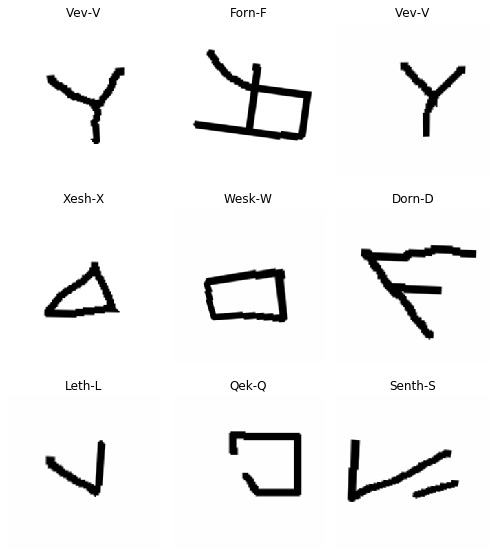

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Aurek-A',
  'Besh-B',
  'Cresh-C',
  'Dorn-D',
  'Esk-E',
  'Forn-F',
  'Grek-G',
  'Herf-H',
  'Isk-I',
  'Jenth-J',
  'Krill-K',
  'Leth-L',
  'Mern-M',
  'Nern-N',
  'Osk-O',
  'Peth-P',
  'Qek-Q',
  'Resh-R',
  'Senth-S',
  'Trill-T',
  'Usk-U',
  'Vev-V',
  'Wesk-W',
  'Xesh-X',
  'Yirt-Y',
  'Zerek-Z'],
 26,
 415,
 103)

## Train model

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,3.852055,2.786864,0.825243,00:06
1,2.715328,1.566109,0.456311,00:02


In [11]:
learn.save('stage-1')

In [12]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


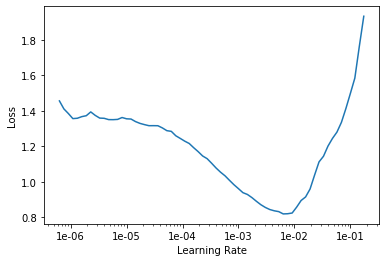

In [14]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [15]:
#learn.fit_one_cycle(20, max_lr=1e-4)
learn.fit_one_cycle(15, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.301957,1.262617,0.378641,00:03
1,1.116265,1.036956,0.310680,00:03
2,0.904767,0.812894,0.252427,00:03
3,0.747342,0.446683,0.155340,00:03
4,0.611492,0.361428,0.106796,00:03
5,0.504858,0.198310,0.048544,00:03
6,0.424019,0.101266,0.038835,00:03
7,0.364786,0.117766,0.038835,00:03
8,0.315004,0.110065,0.029126,00:03
9,0.270604,0.135468,0.038835,00:03


In [16]:
learn.save('stage-2')

## Interpretation

In [17]:
learn.load('stage-2');

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

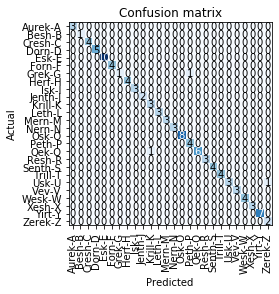

In [19]:
interp.plot_confusion_matrix()

In [20]:
interp.most_confused(min_val=1)

[('Grek-G', 'Peth-P', 1), ('Qek-Q', 'Krill-K', 1), ('Usk-U', 'Zerek-Z', 1)]

In [21]:
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

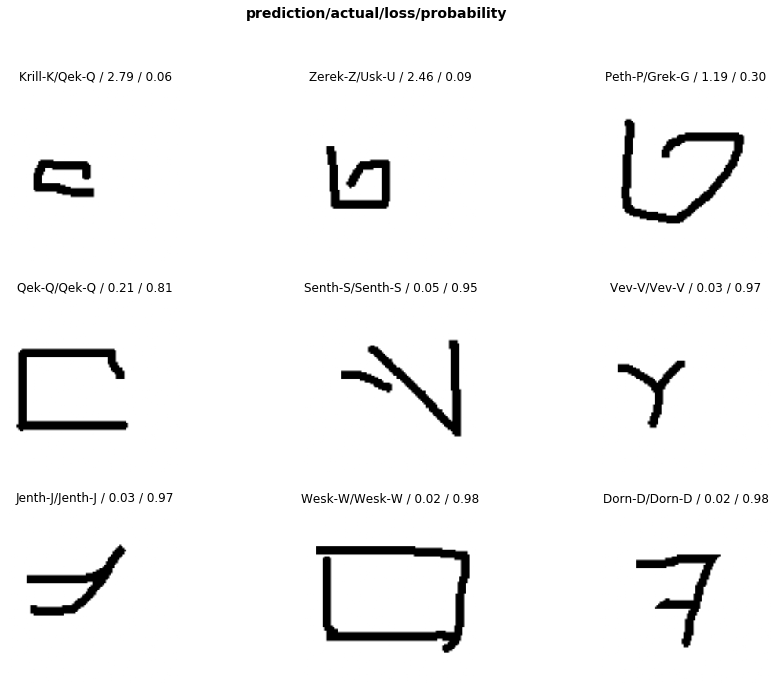

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

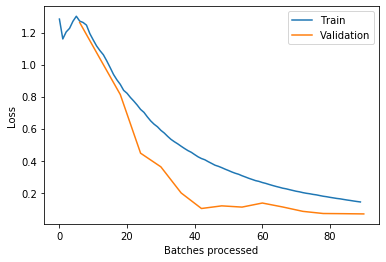

In [23]:
learn.recorder.plot_losses()

In [28]:
?learner.export

Object `learner.export` not found.


## Clean up data

Optionally tweak the datasets to remove noise. Uncertain how to get this to propogate into the actual files for when I want to rerun this notebook?

In [ ]:
from fastai.widgets import *

In [ ]:
losses, idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [ ]:
ic = ImageCleaner(data.valid_ds, idxs, path)

In [ ]:
#losses, idxs = interp.top_losses()
#top_loss_paths = data.train_ds.x[idxs]
ic = ImageCleaner(data.train_ds, idxs, path)